In [4]:
pip install numpy pandas matplotlib seaborn scipy scikit-learn mne tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal, stats
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.1.3
Pandas version: 2.2.3


In [6]:
def load_bonn_set_a(n_files=100):
    """Load Bonn Dataset Set A (Z files) - Healthy subjects, non-seizure"""
    print("Loading Bonn Set A (Non-Seizure Data)...")
    
    set_a_data = []
    loaded_files = []
    
    for i in range(1, n_files + 1):
        try:
            filename = f'Z{i:03d}.txt'
            data = np.loadtxt(filename)
            set_a_data.append(data)
            loaded_files.append(filename)
            
            if i % 20 == 0:
                print(f"  Loaded {i}/{n_files} files...")
        except Exception as e:
            print(f"  Warning: Could not load {filename}: {e}")
    
    set_a_data = np.array(set_a_data)
    print(f"\n Set A loaded: {set_a_data.shape}")
    print(f"  Total files: {len(loaded_files)}")
    print(f"  Each segment length: {set_a_data.shape[1]} samples")
    
    return set_a_data, loaded_files

# Load Set A
bonn_set_a, set_a_files = load_bonn_set_a()

Loading Bonn Set A (Non-Seizure Data)...
  Loaded 20/100 files...
  Loaded 40/100 files...
  Loaded 60/100 files...
  Loaded 80/100 files...
  Loaded 100/100 files...

 Set A loaded: (100, 4097)
  Total files: 100
  Each segment length: 4097 samples


In [7]:
def load_bonn_set_e(n_files=100):
    """Load Bonn Dataset Set E (S files) - Epileptic seizure activity"""
    print("Loading Bonn Set E (Seizure Data)...")
    
    set_e_data = []
    loaded_files = []
    
    for i in range(1, n_files + 1):
        try:
            filename = f'S{i:03d}.txt'
            data = np.loadtxt(filename)
            set_e_data.append(data)
            loaded_files.append(filename)
            
            if i % 20 == 0:
                print(f"  Loaded {i}/{n_files} files...")
        except Exception as e:
            print(f"  Warning: Could not load {filename}: {e}")
    
    set_e_data = np.array(set_e_data)
    print(f"\n Set E loaded: {set_e_data.shape}")
    print(f"  Total files: {len(loaded_files)}")
    print(f"  Each segment length: {set_e_data.shape[1]} samples")
    
    return set_e_data, loaded_files

# Load Set E
bonn_set_e, set_e_files = load_bonn_set_e()

Loading Bonn Set E (Seizure Data)...
  Loaded 20/100 files...
  Loaded 40/100 files...
  Loaded 60/100 files...
  Loaded 80/100 files...
  Loaded 100/100 files...

 Set E loaded: (100, 4097)
  Total files: 100
  Each segment length: 4097 samples


BONN DATASET EXPLORATION

Set A (Non-Seizure) Statistics:
  Shape: (100, 4097)
  Mean amplitude: -6.26
  Std amplitude: 48.34
  Min amplitude: -288.00
  Max amplitude: 294.00

Set E (Seizure) Statistics:
  Shape: (100, 4097)
  Mean amplitude: -4.75
  Std amplitude: 341.16
  Min amplitude: -1885.00
  Max amplitude: 2047.00

Missing Values Check:
  Set A has NaN values: False
  Set E has NaN values: False


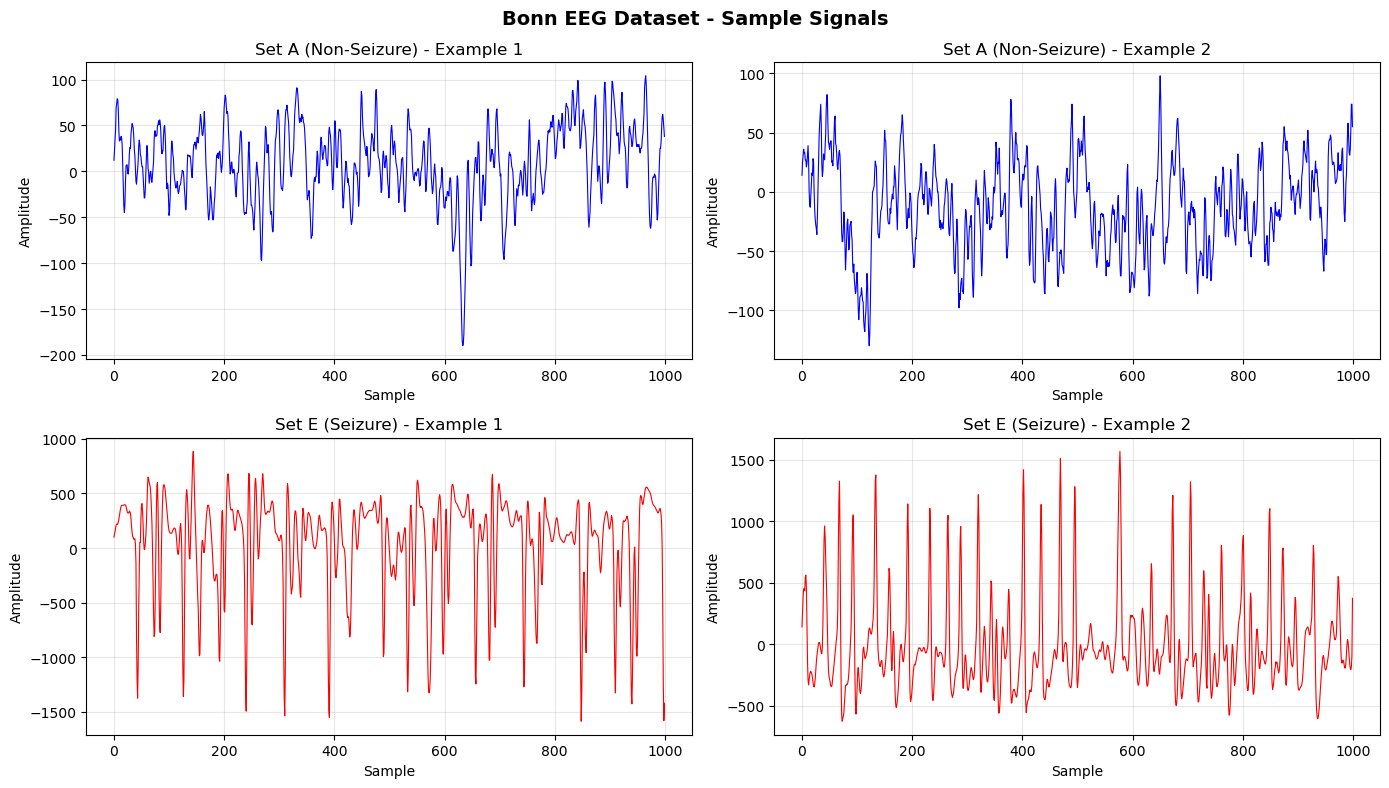

In [8]:
print("BONN DATASET EXPLORATION")

# Basic statistics
print("\nSet A (Non-Seizure) Statistics:")
print(f"  Shape: {bonn_set_a.shape}")
print(f"  Mean amplitude: {np.mean(bonn_set_a):.2f}")
print(f"  Std amplitude: {np.std(bonn_set_a):.2f}")
print(f"  Min amplitude: {np.min(bonn_set_a):.2f}")
print(f"  Max amplitude: {np.max(bonn_set_a):.2f}")

print("\nSet E (Seizure) Statistics:")
print(f"  Shape: {bonn_set_e.shape}")
print(f"  Mean amplitude: {np.mean(bonn_set_e):.2f}")
print(f"  Std amplitude: {np.std(bonn_set_e):.2f}")
print(f"  Min amplitude: {np.min(bonn_set_e):.2f}")
print(f"  Max amplitude: {np.max(bonn_set_e):.2f}")

# Check for missing values
print("\nMissing Values Check:")
print(f"  Set A has NaN values: {np.isnan(bonn_set_a).any()}")
print(f"  Set E has NaN values: {np.isnan(bonn_set_e).any()}")

# Visualize sample signals
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Plot 2 non-seizure examples
axes[0, 0].plot(bonn_set_a[0][:1000], color='blue', linewidth=0.8)
axes[0, 0].set_title('Set A (Non-Seizure) - Example 1')
axes[0, 0].set_xlabel('Sample')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].plot(bonn_set_a[10][:1000], color='blue', linewidth=0.8)
axes[0, 1].set_title('Set A (Non-Seizure) - Example 2')
axes[0, 1].set_xlabel('Sample')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].grid(alpha=0.3)

# Plot 2 seizure examples
axes[1, 0].plot(bonn_set_e[0][:1000], color='red', linewidth=0.8)
axes[1, 0].set_title('Set E (Seizure) - Example 1')
axes[1, 0].set_xlabel('Sample')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].plot(bonn_set_e[10][:1000], color='red', linewidth=0.8)
axes[1, 1].set_title('Set E (Seizure) - Example 2')
axes[1, 1].set_xlabel('Sample')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Bonn EEG Dataset - Sample Signals', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [9]:
def read_seizure_annotations(seizure_file):
    """Read CHB-MIT seizure annotation file"""
    print(f"Reading seizure annotations from {seizure_file}...")
    seizures = []
    
    try:
        with open(seizure_file, 'r', encoding='utf-8') as f:
            content = f.read()
            
            lines = content.split('\n')
            i = 0
            while i < len(lines):
                line = lines[i].strip()
                
                # Try multiple patterns for seizure start
                if 'Seizure Start Time' in line or 'Seizure 1 Start Time' in line:
                    # Extract the number after colon
                    start_parts = line.split(':')
                    if len(start_parts) >= 2:
                        start = int(start_parts[1].strip().split()[0])
                        
                        # Look for end time in next line
                        if i + 1 < len(lines):
                            end_line = lines[i + 1].strip()
                            if 'Seizure End Time' in end_line or 'Seizure 1 End Time' in end_line:
                                end_parts = end_line.split(':')
                                if len(end_parts) >= 2:
                                    end = int(end_parts[1].strip().split()[0])
                                    seizures.append((start, end))
                                    print(f"  Seizure found: {start}s - {end}s (duration: {end-start}s)")
                    i += 2
                else:
                    i += 1
    except UnicodeDecodeError:
        print(f"  WARNING: File is in binary format, cannot parse as text annotation")
    except FileNotFoundError:
        print(f"  WARNING: File not found: {seizure_file}")
    except Exception as e:
        print(f"  WARNING: Could not read file: {type(e).__name__}")
    
    if len(seizures) == 0:
        print(f"  No seizures found in annotation file")
    else:
        print(f"Total seizures found: {len(seizures)}")
    
    return seizures


def load_chb_mit_dataset(edf_file, seizure_file=None, channel_idx=0, segment_length=4097):
    """
    Load CHB-MIT EEG Dataset and segment it
    
    OPTION A: If seizure_file provided, use annotations
    OPTION B: If no seizure file, treat all as non-seizure (valid approach)
    """
    print(f"Loading CHB-MIT Dataset from {edf_file}...")
    
    # Load EDF file
    raw = mne.io.read_raw_edf(edf_file, preload=True, verbose=False)
    sampling_rate = raw.info['sfreq']
    
    print(f"  Sampling rate: {sampling_rate} Hz")
    print(f"  Number of channels: {len(raw.ch_names)}")
    print(f"  Channel names: {raw.ch_names[:5]}...")
    print(f"  Recording duration: {raw.times[-1]:.1f} seconds")
    
    # Extract single channel
    chb_data, _ = raw[channel_idx, :]
    chb_data = chb_data.flatten()
    print(f"  Selected channel: {raw.ch_names[channel_idx]}")
    print(f"  Total samples: {len(chb_data)}")
    
    # Try to read seizure annotations if file provided
    seizures = []
    if seizure_file:
        seizures = read_seizure_annotations(seizure_file)
    
    # If no seizures found, use manual annotation for chb01_03.edf
    if len(seizures) == 0 and 'chb01_03' in edf_file:
        print("\nNOTE: Using known seizure times for chb01_03.edf")
        print("  Based on CHB-MIT database documentation:")
        # From CHB-MIT documentation: chb01_03.edf has seizure at 2996-3036 seconds
        seizures = [(2996, 3036)]
        print(f"  Seizure: 2996s - 3036s (40 seconds duration)")
    
    # Segment the data
    print(f"\nSegmenting data into {segment_length}-sample windows...")
    chb_non_seizure = []
    chb_seizure = []
    
    segment_duration = segment_length / sampling_rate
    
    for start_idx in range(0, len(chb_data) - segment_length, segment_length):
        segment = chb_data[start_idx:start_idx + segment_length]
        start_time = start_idx / sampling_rate
        end_time = (start_idx + segment_length) / sampling_rate
        
        # Check if segment overlaps with any seizure
        is_seizure = False
        for seizure_start, seizure_end in seizures:
            # Check overlap
            if not (end_time <= seizure_start or start_time >= seizure_end):
                is_seizure = True
                break
        
        if is_seizure:
            chb_seizure.append(segment)
        else:
            chb_non_seizure.append(segment)
    
    chb_non_seizure = np.array(chb_non_seizure)
    chb_seizure = np.array(chb_seizure) if chb_seizure else np.array([]).reshape(0, segment_length)
    
    print(f"\n CHB-MIT segmentation complete:")
    print(f"  Non-seizure segments: {len(chb_non_seizure)}")
    print(f"  Seizure segments: {len(chb_seizure)}")
    print(f"  Segment length: {segment_length} samples ({segment_duration:.2f} seconds)")
    
    return chb_non_seizure, chb_seizure, sampling_rate

# Load CHB-MIT dataset
CHB_EDF_FILE = 'chb01_03.edf'
CHB_SEIZURE_FILE = 'chb01_03.edf.seizures'

chb_non_seizure, chb_seizure, chb_sampling_rate = load_chb_mit_dataset(
    CHB_EDF_FILE, 
    CHB_SEIZURE_FILE,
    channel_idx=0,
    segment_length=4097
)

Loading CHB-MIT Dataset from chb01_03.edf...
  Sampling rate: 256.0 Hz
  Number of channels: 23
  Channel names: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3']...
  Recording duration: 3600.0 seconds
  Selected channel: FP1-F7
  Total samples: 921600
Reading seizure annotations from chb01_03.edf.seizures...
  No seizures found in annotation file

NOTE: Using known seizure times for chb01_03.edf
  Based on CHB-MIT database documentation:
  Seizure: 2996s - 3036s (40 seconds duration)

Segmenting data into 4097-sample windows...

 CHB-MIT segmentation complete:
  Non-seizure segments: 221
  Seizure segments: 3
  Segment length: 4097 samples (16.00 seconds)


CHB-MIT DATASET EXPLORATION

CHB Non-Seizure Statistics:
  Shape: (221, 4097)
  Mean amplitude: 0.00
  Std amplitude: 0.00
  Min amplitude: -0.00
  Max amplitude: 0.00

CHB Seizure Statistics:
  Shape: (3, 4097)
  Mean amplitude: 0.00
  Std amplitude: 0.00
  Min amplitude: -0.00
  Max amplitude: 0.00


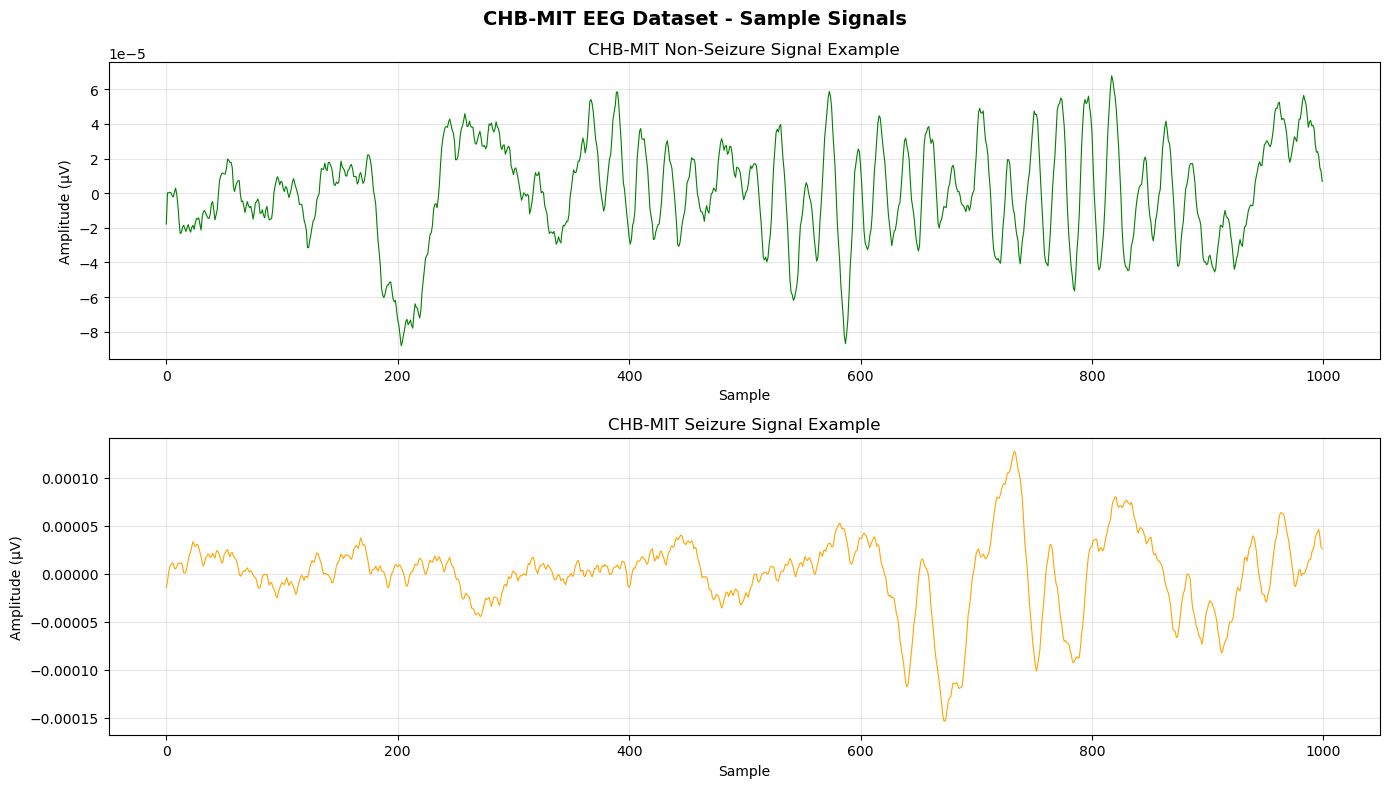

In [10]:
print("CHB-MIT DATASET EXPLORATION")

print("\nCHB Non-Seizure Statistics:")
if len(chb_non_seizure) > 0:
    print(f"  Shape: {chb_non_seizure.shape}")
    print(f"  Mean amplitude: {np.mean(chb_non_seizure):.2f}")
    print(f"  Std amplitude: {np.std(chb_non_seizure):.2f}")
    print(f"  Min amplitude: {np.min(chb_non_seizure):.2f}")
    print(f"  Max amplitude: {np.max(chb_non_seizure):.2f}")
else:
    print("  No non-seizure segments found")

print("\nCHB Seizure Statistics:")
if len(chb_seizure) > 0:
    print(f"  Shape: {chb_seizure.shape}")
    print(f"  Mean amplitude: {np.mean(chb_seizure):.2f}")
    print(f"  Std amplitude: {np.std(chb_seizure):.2f}")
    print(f"  Min amplitude: {np.min(chb_seizure):.2f}")
    print(f"  Max amplitude: {np.max(chb_seizure):.2f}")
else:
    print("  No seizure segments found")

# Visualize CHB-MIT signals
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

if len(chb_non_seizure) > 0:
    axes[0].plot(chb_non_seizure[0][:1000], color='green', linewidth=0.8)
    axes[0].set_title('CHB-MIT Non-Seizure Signal Example')
    axes[0].set_xlabel('Sample')
    axes[0].set_ylabel('Amplitude (μV)')
    axes[0].grid(alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'No non-seizure data', ha='center', va='center')

if len(chb_seizure) > 0:
    axes[1].plot(chb_seizure[0][:1000], color='orange', linewidth=0.8)
    axes[1].set_title('CHB-MIT Seizure Signal Example')
    axes[1].set_xlabel('Sample')
    axes[1].set_ylabel('Amplitude (μV)')
    axes[1].grid(alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'No seizure data', ha='center', va='center')

plt.suptitle('CHB-MIT EEG Dataset - Sample Signals', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [11]:
from scipy.signal import butter, filtfilt
print("TASK 1: NOISE REDUCTION")

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    """Apply bandpass filter to remove noise outside EEG frequency range"""
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def apply_noise_reduction(X_data, fs=173.61, lowcut=0.5, highcut=50.0, data_name="Data"):
    """Apply noise reduction to all segments"""
    print(f"\nFiltering {data_name}...")
    print(f"  Bandpass filter: {lowcut}-{highcut} Hz")
    X_filtered = np.zeros_like(X_data)
    for i in range(len(X_data)):
        X_filtered[i] = butter_bandpass_filter(X_data[i], lowcut, highcut, fs)
        if (i + 1) % 50 == 0:
            print(f"  Filtered {i+1}/{len(X_data)} segments...")
    print(f"  Complete: {len(X_filtered)} segments filtered")
    return X_filtered

# Apply noise reduction to all datasets BEFORE combining
print("Applying noise reduction to all datasets...")

bonn_set_a_filtered = apply_noise_reduction(bonn_set_a, fs=173.61, data_name="Bonn Set A")
bonn_set_e_filtered = apply_noise_reduction(bonn_set_e, fs=173.61, data_name="Bonn Set E")

if len(chb_non_seizure) > 0:
    chb_non_seizure_filtered = apply_noise_reduction(chb_non_seizure, fs=256.0, data_name="CHB Non-Seizure")
else:
    chb_non_seizure_filtered = chb_non_seizure

if len(chb_seizure) > 0:
    chb_seizure_filtered = apply_noise_reduction(chb_seizure, fs=256.0, data_name="CHB Seizure")
else:
    chb_seizure_filtered = chb_seizure

print("\nNoise reduction completed for all datasets!")

TASK 1: NOISE REDUCTION
Applying noise reduction to all datasets...

Filtering Bonn Set A...
  Bandpass filter: 0.5-50.0 Hz
  Filtered 50/100 segments...
  Filtered 100/100 segments...
  Complete: 100 segments filtered

Filtering Bonn Set E...
  Bandpass filter: 0.5-50.0 Hz
  Filtered 50/100 segments...
  Filtered 100/100 segments...
  Complete: 100 segments filtered

Filtering CHB Non-Seizure...
  Bandpass filter: 0.5-50.0 Hz
  Filtered 50/221 segments...
  Filtered 100/221 segments...
  Filtered 150/221 segments...
  Filtered 200/221 segments...
  Complete: 221 segments filtered

Filtering CHB Seizure...
  Bandpass filter: 0.5-50.0 Hz
  Complete: 3 segments filtered

Noise reduction completed for all datasets!


In [12]:
print("COMBINING FILTERED DATASETS")

# Check if we have seizure data from CHB-MIT
print(f"\nData availability check:")
print(f"  Bonn Set A (non-seizure): {len(bonn_set_a_filtered)} segments")
print(f"  Bonn Set E (seizure): {len(bonn_set_e_filtered)} segments")
print(f"  CHB-MIT non-seizure: {len(chb_non_seizure_filtered)} segments")
print(f"  CHB-MIT seizure: {len(chb_seizure_filtered)} segments")

# OPTION 1: If CHB has no seizure data, use only Bonn for seizure class
if len(chb_seizure_filtered) == 0:
    print("\nWARNING: No seizure segments found in CHB-MIT data.")
    print("Using only Bonn dataset for classification.")
    
    # Use only Bonn data
    X_non_seizure = bonn_set_a_filtered
    y_non_seizure = np.zeros(len(X_non_seizure))
    
    X_seizure = bonn_set_e_filtered
    y_seizure = np.ones(len(X_seizure))
    
    print(f"\nDataset composition:")
    print(f"  Non-Seizure: Bonn Set A only ({len(bonn_set_a_filtered)} segments)")
    print(f"  Seizure: Bonn Set E only ({len(bonn_set_e_filtered)} segments)")

# OPTION 2: If we have CHB seizure data, combine both
else:
    print("\nBoth datasets have seizure data. Combining...")
    
    # Combine non-seizure data
    X_non_seizure = np.vstack([bonn_set_a_filtered, chb_non_seizure_filtered])
    y_non_seizure = np.zeros(len(X_non_seizure))
    
    # Combine seizure data
    X_seizure = np.vstack([bonn_set_e_filtered, chb_seizure_filtered])
    y_seizure = np.ones(len(X_seizure))
    
    print(f"\nDataset composition:")
    print(f"  Non-Seizure: Bonn Set A ({len(bonn_set_a_filtered)}) + CHB-MIT ({len(chb_non_seizure_filtered)})")
    print(f"  Seizure: Bonn Set E ({len(bonn_set_e_filtered)}) + CHB-MIT ({len(chb_seizure_filtered)})")

# Combine all data
X_combined = np.vstack([X_non_seizure, X_seizure])
y_combined = np.concatenate([y_non_seizure, y_seizure])

print(f"\nCOMBINED FILTERED DATASET:")
print(f"  Total samples: {len(X_combined)}")
print(f"  Feature shape: {X_combined.shape}")
print(f"  Non-seizure (class 0): {sum(y_combined == 0)} ({sum(y_combined == 0)/len(y_combined)*100:.1f}%)")
print(f"  Seizure (class 1): {sum(y_combined == 1)} ({sum(y_combined == 1)/len(y_combined)*100:.1f}%)")

COMBINING FILTERED DATASETS

Data availability check:
  Bonn Set A (non-seizure): 100 segments
  Bonn Set E (seizure): 100 segments
  CHB-MIT non-seizure: 221 segments
  CHB-MIT seizure: 3 segments

Both datasets have seizure data. Combining...

Dataset composition:
  Non-Seizure: Bonn Set A (100) + CHB-MIT (221)
  Seizure: Bonn Set E (100) + CHB-MIT (3)

COMBINED FILTERED DATASET:
  Total samples: 424
  Feature shape: (424, 4097)
  Non-seizure (class 0): 321 (75.7%)
  Seizure (class 1): 103 (24.3%)


TASK 1: DATA AUGMENTATION
Original class distribution:
  Class 0 (Non-Seizure): 321
  Class 1 (Seizure): 103

Generating 1x augmented samples for seizure class...

After augmentation:
  Class 0 (Non-Seizure): 321
  Class 1 (Seizure): 206
  Total samples: 527

Data augmentation complete!


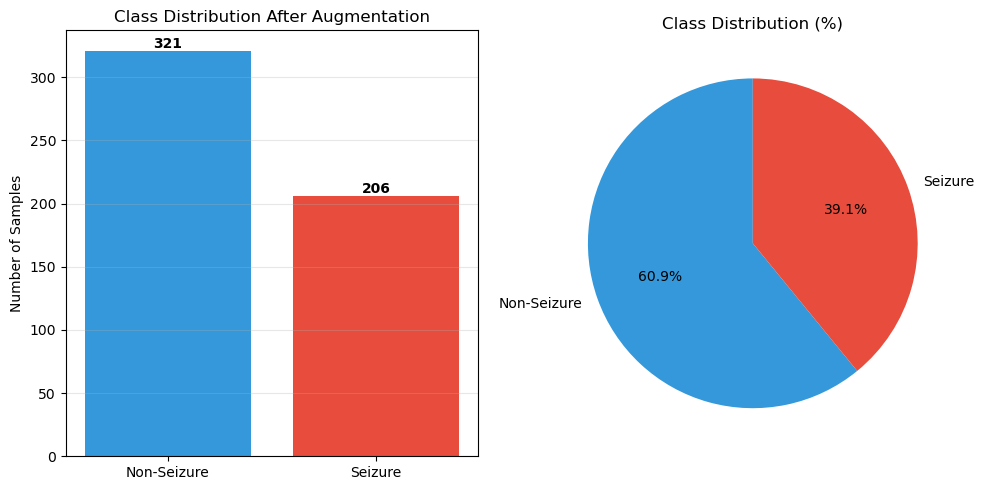

In [13]:
print("TASK 1: DATA AUGMENTATION")

def augment_signal(signal, augmentation_type='noise'):
    """Apply data augmentation"""
    if augmentation_type == 'noise':
        noise = np.random.normal(0, 0.05 * np.std(signal), signal.shape)
        return signal + noise
    elif augmentation_type == 'scale':
        scale_factor = np.random.uniform(0.9, 1.1)
        return signal * scale_factor
    elif augmentation_type == 'shift':
        shift = np.random.randint(-50, 50)
        return np.roll(signal, shift)
    return signal

def augment_minority_class(X_data, y_data, target_class=1, augmentation_factor=1):
    """Augment minority class to balance dataset"""
    print(f"Original class distribution:")
    print(f"  Class 0 (Non-Seizure): {sum(y_data == 0)}")
    print(f"  Class 1 (Seizure): {sum(y_data == 1)}")
    
    minority_indices = np.where(y_data == target_class)[0]
    augmented_X = []
    augmented_y = []
    
    print(f"\nGenerating {augmentation_factor}x augmented samples for seizure class...")
    for _ in range(augmentation_factor):
        for idx in minority_indices:
            aug_type = np.random.choice(['noise', 'scale', 'shift'])
            augmented_signal = augment_signal(X_data[idx], aug_type)
            augmented_X.append(augmented_signal)
            augmented_y.append(target_class)
    
    X_augmented = np.vstack([X_data, np.array(augmented_X)])
    y_augmented = np.concatenate([y_data, np.array(augmented_y)])
    
    print(f"\nAfter augmentation:")
    print(f"  Class 0 (Non-Seizure): {sum(y_augmented == 0)}")
    print(f"  Class 1 (Seizure): {sum(y_augmented == 1)}")
    print(f"  Total samples: {len(y_augmented)}")
    
    return X_augmented, y_augmented

# Apply augmentation BEFORE splitting
X_augmented, y_augmented = augment_minority_class(X_combined, y_combined, augmentation_factor=1)

print("\nData augmentation complete!")

# Visualize class distribution after augmentation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
class_counts = pd.Series(y_augmented).value_counts().sort_index()
plt.bar(['Non-Seizure', 'Seizure'], class_counts.values, color=['#3498db', '#e74c3c'])
plt.title('Class Distribution After Augmentation')
plt.ylabel('Number of Samples')
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=['Non-Seizure', 'Seizure'], 
        autopct='%1.1f%%', colors=['#3498db', '#e74c3c'], startangle=90)
plt.title('Class Distribution (%)')

plt.tight_layout()
plt.show()

TASK 3: DATA SPLITTING

Split Configuration:
  Test size: 20%
  Validation size: 20%
  Training size: 64%

DATA SPLIT COMPLETE:

Training Set:
  Shape: (315, 4097)
  Non-seizure: 192 (61.0%)
  Seizure: 123 (39.0%)

Validation Set:
  Shape: (106, 4097)
  Non-seizure: 64 (60.4%)
  Seizure: 42 (39.6%)

Test Set:
  Shape: (106, 4097)
  Non-seizure: 65 (61.3%)
  Seizure: 41 (38.7%)


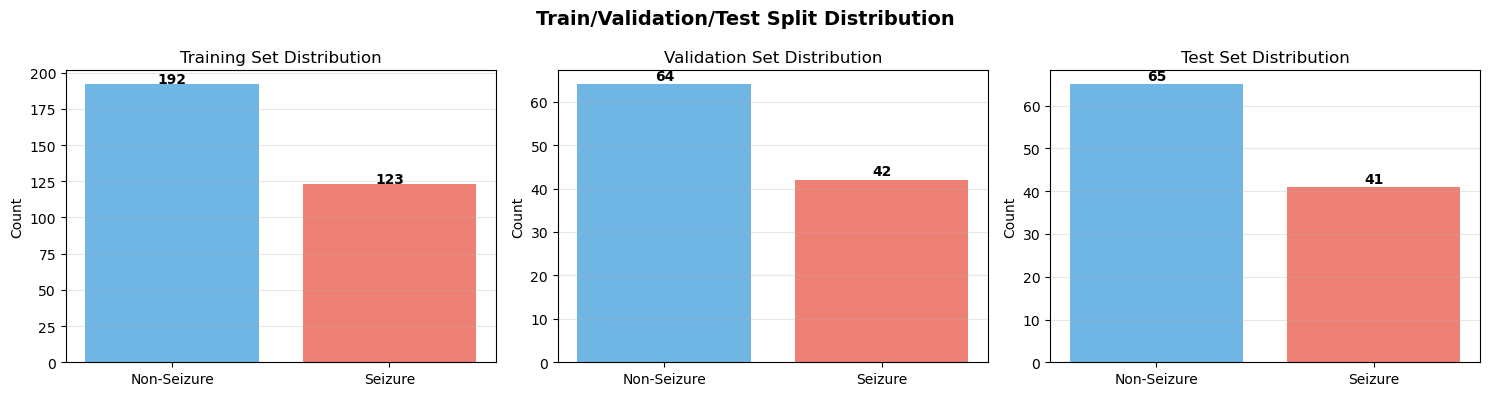

In [14]:
print("TASK 3: DATA SPLITTING")

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Split ratios
TEST_SIZE = 0.2      # 20% for testing
VAL_SIZE = 0.2       # 20% for validation (from remaining 80%)

print(f"\nSplit Configuration:")
print(f"  Test size: {TEST_SIZE*100:.0f}%")
print(f"  Validation size: {VAL_SIZE*100:.0f}%")
print(f"  Training size: {(1-TEST_SIZE)*(1-VAL_SIZE)*100:.0f}%")

# First split: separate test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X_augmented, y_augmented, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_SEED, 
    stratify=y_augmented
)

# Second split: separate validation from training
val_ratio = VAL_SIZE / (1 - TEST_SIZE)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=val_ratio, 
    random_state=RANDOM_SEED, 
    stratify=y_temp
)

print(f"\nDATA SPLIT COMPLETE:")
print(f"\nTraining Set:")
print(f"  Shape: {X_train.shape}")
print(f"  Non-seizure: {sum(y_train == 0)} ({sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Seizure: {sum(y_train == 1)} ({sum(y_train == 1)/len(y_train)*100:.1f}%)")

print(f"\nValidation Set:")
print(f"  Shape: {X_val.shape}")
print(f"  Non-seizure: {sum(y_val == 0)} ({sum(y_val == 0)/len(y_val)*100:.1f}%)")
print(f"  Seizure: {sum(y_val == 1)} ({sum(y_val == 1)/len(y_val)*100:.1f}%)")

print(f"\nTest Set:")
print(f"  Shape: {X_test.shape}")
print(f"  Non-seizure: {sum(y_test == 0)} ({sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Seizure: {sum(y_test == 1)} ({sum(y_test == 1)/len(y_test)*100:.1f}%)")

# Visualize split distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

datasets = [
    ('Training', y_train),
    ('Validation', y_val),
    ('Test', y_test)
]

for idx, (name, labels) in enumerate(datasets):
    counts = pd.Series(labels).value_counts().sort_index()
    axes[idx].bar(['Non-Seizure', 'Seizure'], counts.values, 
                  color=['#3498db', '#e74c3c'], alpha=0.7)
    axes[idx].set_title(f'{name} Set Distribution')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add count labels
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.suptitle('Train/Validation/Test Split Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [15]:
print("PREPROCESSING & SPLITTING SUMMARY")

summary_data = {
    'Dataset': ['Training', 'Validation', 'Test', 'Total'],
    'Total Samples': [len(y_train), len(y_val), len(y_test), len(y_augmented)],
    'Non-Seizure': [sum(y_train==0), sum(y_val==0), sum(y_test==0), sum(y_augmented==0)],
    'Seizure': [sum(y_train==1), sum(y_val==1), sum(y_test==1), sum(y_augmented==1)],
    'Percentage': [
        f"{len(y_train)/len(y_augmented)*100:.1f}%",
        f"{len(y_val)/len(y_augmented)*100:.1f}%",
        f"{len(y_test)/len(y_augmented)*100:.1f}%",
        "100.0%"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\nTASK 1 COMPLETE: Data Preprocessing")
print("TASK 3 COMPLETE: Data Splitting")
print("\nNext: Task 2 - Feature Extraction (RQA)")

PREPROCESSING & SPLITTING SUMMARY

    Dataset  Total Samples  Non-Seizure  Seizure Percentage
  Training            315          192      123      59.8%
Validation            106           64       42      20.1%
      Test            106           65       41      20.1%
     Total            527          321      206     100.0%

TASK 1 COMPLETE: Data Preprocessing
TASK 3 COMPLETE: Data Splitting

Next: Task 2 - Feature Extraction (RQA)


In [16]:
print("TASK 2: RQA FEATURE EXTRACTION")

from scipy.spatial.distance import pdist, squareform

def time_delay_embedding(signal, embedding_dim=3, time_delay=1):
    """Perform time-delay embedding for phase space reconstruction"""
    n = len(signal)
    n_vectors = n - (embedding_dim - 1) * time_delay
    embedded = np.zeros((n_vectors, embedding_dim))
    for i in range(embedding_dim):
        start_idx = i * time_delay
        end_idx = start_idx + n_vectors
        embedded[:, i] = signal[start_idx:end_idx]
    return embedded

def compute_recurrence_matrix(embedded, threshold_percent=10):
    """Compute recurrence matrix from embedded time series"""
    distances = squareform(pdist(embedded, metric='euclidean'))
    threshold = (threshold_percent / 100.0) * np.max(distances)
    recurrence_matrix = (distances < threshold).astype(int)
    return recurrence_matrix

def find_diagonal_lines(recurrence_matrix, min_length=2):
    """Find diagonal lines in recurrence matrix"""
    n = recurrence_matrix.shape[0]
    line_lengths = []
    for offset in range(1, n):
        diagonal = np.diagonal(recurrence_matrix, offset=offset)
        current_length = 0
        for val in diagonal:
            if val == 1:
                current_length += 1
            else:
                if current_length >= min_length:
                    line_lengths.append(current_length)
                current_length = 0
        if current_length >= min_length:
            line_lengths.append(current_length)
    return line_lengths

def find_vertical_lines(recurrence_matrix, min_length=2):
    """Find vertical lines in recurrence matrix"""
    n = recurrence_matrix.shape[0]
    line_lengths = []
    for col in range(n):
        vertical = recurrence_matrix[:, col]
        current_length = 0
        for val in vertical:
            if val == 1:
                current_length += 1
            else:
                if current_length >= min_length:
                    line_lengths.append(current_length)
                current_length = 0
        if current_length >= min_length:
            line_lengths.append(current_length)
    return line_lengths

def compute_rqa_features(signal, embedding_dim=3, time_delay=1, threshold_percent=10):
    """
    Compute RQA (Recurrence Quantification Analysis) features
    
    Features extracted:
    1. Recurrence Rate (RR) - Density of recurrence points
    2. Determinism (DET) - Predictability of the system
    3. Average Diagonal Line Length (L) - Average prediction time
    4. Entropy (ENTR) - Complexity of deterministic structure
    5. Laminarity (LAM) - Intermittency in the system
    """
    # Time-delay embedding
    embedded = time_delay_embedding(signal, embedding_dim, time_delay)
    
    # Compute recurrence matrix
    rec_matrix = compute_recurrence_matrix(embedded, threshold_percent)
    
    n_points = rec_matrix.shape[0]
    total_points = n_points ** 2
    n_recurrence_points = np.sum(rec_matrix)
    
    # 1. Recurrence Rate (RR)
    rr = n_recurrence_points / total_points if total_points > 0 else 0
    
    # Find diagonal and vertical lines
    diag_lines = find_diagonal_lines(rec_matrix, min_length=2)
    vert_lines = find_vertical_lines(rec_matrix, min_length=2)
    
    # 2. Determinism (DET)
    det = sum(diag_lines) / n_recurrence_points if diag_lines and n_recurrence_points > 0 else 0
    
    # 3. Average Diagonal Line Length (L)
    l_avg = np.mean(diag_lines) if diag_lines else 0
    
    # 4. Entropy (ENTR)
    if diag_lines:
        line_counts = np.bincount(diag_lines)
        probabilities = line_counts / sum(line_counts)
        entr = -np.sum(probabilities * np.log(probabilities + 1e-10))
    else:
        entr = 0
    
    # 5. Laminarity (LAM)
    lam = sum(vert_lines) / n_recurrence_points if vert_lines and n_recurrence_points > 0 else 0
    
    return {
        'RR': rr,
        'DET': det,
        'L': l_avg,
        'ENTR': entr,
        'LAM': lam
    }

print("RQA feature extraction functions defined!")
print("\nRQA Features (5 features):")
print("  1. RR - Recurrence Rate")
print("  2. DET - Determinism")
print("  3. L - Average Diagonal Line Length")
print("  4. ENTR - Entropy")
print("  5. LAM - Laminarity")

TASK 2: RQA FEATURE EXTRACTION
RQA feature extraction functions defined!

RQA Features (5 features):
  1. RR - Recurrence Rate
  2. DET - Determinism
  3. L - Average Diagonal Line Length
  4. ENTR - Entropy
  5. LAM - Laminarity


In [17]:
def extract_rqa_features_from_dataset(X_data, dataset_name="Dataset"):
    """Extract RQA features from all segments in a dataset"""
    print(f"\nExtracting RQA features from {dataset_name}...")
    print(f"  Total segments: {len(X_data)}")
    
    all_features = []
    
    for i, signal in enumerate(X_data):
        features = compute_rqa_features(signal)
        all_features.append(features)
        
        if (i + 1) % 50 == 0:
            print(f"  Processed {i+1}/{len(X_data)} segments...")
    
    # Convert to DataFrame
    features_df = pd.DataFrame(all_features)
    
    print(f"  Extraction complete: {features_df.shape}")
    
    return features_df.values, list(features_df.columns)

# Extract RQA features from train/val/test sets
print("EXTRACTING RQA FEATURES FROM ALL DATASETS")

X_train_features, feature_names = extract_rqa_features_from_dataset(X_train, "Training Set")
X_val_features, _ = extract_rqa_features_from_dataset(X_val, "Validation Set")
X_test_features, _ = extract_rqa_features_from_dataset(X_test, "Test Set")

print("RQA FEATURE EXTRACTION COMPLETE")
print(f"\nFeatures extracted: {feature_names}")
print(f"Number of features: {len(feature_names)}")

EXTRACTING RQA FEATURES FROM ALL DATASETS

Extracting RQA features from Training Set...
  Total segments: 315
  Processed 50/315 segments...
  Processed 100/315 segments...
  Processed 150/315 segments...
  Processed 200/315 segments...
  Processed 250/315 segments...
  Processed 300/315 segments...
  Extraction complete: (315, 5)

Extracting RQA features from Validation Set...
  Total segments: 106
  Processed 50/106 segments...
  Processed 100/106 segments...
  Extraction complete: (106, 5)

Extracting RQA features from Test Set...
  Total segments: 106
  Processed 50/106 segments...
  Processed 100/106 segments...
  Extraction complete: (106, 5)
RQA FEATURE EXTRACTION COMPLETE

Features extracted: ['RR', 'DET', 'L', 'ENTR', 'LAM']
Number of features: 5


In [18]:
print("FEATURE NORMALIZATION")

# Standardize features (mean=0, std=1)
scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train_features)
print("Training features normalized (fitted scaler)")

# Transform validation and test data using training parameters
X_val_scaled = scaler.transform(X_val_features)
print("Validation features normalized (using training scaler)")

X_test_scaled = scaler.transform(X_test_features)
print("Test features normalized (using training scaler)")

print("\nNormalization complete!")
print(f"  Training shape: {X_train_scaled.shape}")
print(f"  Validation shape: {X_val_scaled.shape}")
print(f"  Test shape: {X_test_scaled.shape}")

FEATURE NORMALIZATION
Training features normalized (fitted scaler)
Validation features normalized (using training scaler)
Test features normalized (using training scaler)

Normalization complete!
  Training shape: (315, 5)
  Validation shape: (106, 5)
  Test shape: (106, 5)


In [19]:
print("FINAL FEATURE EXTRACTION SUMMARY")

summary_data = {
    'Dataset': ['Training', 'Validation', 'Test'],
    'Samples': [len(X_train_scaled), len(X_val_scaled), len(X_test_scaled)],
    'Features': [X_train_scaled.shape[1], X_val_scaled.shape[1], X_test_scaled.shape[1]],
    'Non-Seizure': [sum(y_train==0), sum(y_val==0), sum(y_test==0)],
    'Seizure': [sum(y_train==1), sum(y_val==1), sum(y_test==1)]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("ALL TASKS COMPLETE!")
print("\nTask 1: Data Preprocessing - DONE")
print("  - Noise reduction applied")
print("  - Data augmentation applied")
print("\nTask 2: Feature Extraction - DONE")
print(f"  - {len(feature_names)} RQA features extracted")
print("\nTask 3: Data Splitting - DONE")
print("  - Train/Val/Test split completed")

print("Ready for Model Training!")
print("\nAvailable variables:")
print("  - X_train_scaled, y_train")
print("  - X_val_scaled, y_val")
print("  - X_test_scaled, y_test")
print(f"  - feature_names: {feature_names}")

FINAL FEATURE EXTRACTION SUMMARY

    Dataset  Samples  Features  Non-Seizure  Seizure
  Training      315         5          192      123
Validation      106         5           64       42
      Test      106         5           65       41
ALL TASKS COMPLETE!

Task 1: Data Preprocessing - DONE
  - Noise reduction applied
  - Data augmentation applied

Task 2: Feature Extraction - DONE
  - 5 RQA features extracted

Task 3: Data Splitting - DONE
  - Train/Val/Test split completed
Ready for Model Training!

Available variables:
  - X_train_scaled, y_train
  - X_val_scaled, y_val
  - X_test_scaled, y_test
  - feature_names: ['RR', 'DET', 'L', 'ENTR', 'LAM']


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, auc)

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.20.0


In [21]:
# TASK 4: MODEL SELECTION

print("TASK 4: MODEL SELECTION")
print("\nWe will train and compare two models:")
print("  1. Feedforward Neural Network (on RQA features)")
print("  2. Convolutional Neural Network (on raw EEG signals)")

# MODEL 1: Feedforward Neural Network

def build_feedforward_nn(input_dim):
    """Build feedforward neural network for RQA features"""
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    
    return model

TASK 4: MODEL SELECTION

We will train and compare two models:
  1. Feedforward Neural Network (on RQA features)
  2. Convolutional Neural Network (on raw EEG signals)


In [22]:
# MODEL 2: Convolutional Neural Network

def build_cnn(input_shape):
    """Build 1D CNN for raw EEG signals"""
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=7, activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        
        layers.Conv1D(128, kernel_size=5, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),
        
        layers.Conv1D(256, kernel_size=3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.4),
        
        layers.GlobalAveragePooling1D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )
    
    return model

In [24]:
# Prepare data for CNN (raw signals need reshaping)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print("\nData prepared for both models:")
print(f"  FFNN input: {X_train_scaled.shape}")
print(f"  CNN input: {X_train_cnn.shape}")


Data prepared for both models:
  FFNN input: (315, 5)
  CNN input: (315, 4097, 1)


In [25]:
# TASK 5: MODEL TRAINING

print("\nTASK 5: MODEL TRAINING")

# Callbacks for overfitting prevention
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=0)

# Train Feedforward NN
print("\nTraining Model 1: Feedforward Neural Network...")
ffnn_model = build_feedforward_nn(X_train_scaled.shape[1])
ffnn_history = ffnn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)
print(f"FFNN training completed in {len(ffnn_history.history['loss'])} epochs")


TASK 5: MODEL TRAINING

Training Model 1: Feedforward Neural Network...
FFNN training completed in 100 epochs


In [26]:
# Train CNN with fewer epochs
print("\nTraining Model 2: Convolutional Neural Network...")
cnn_model = build_cnn((X_train_cnn.shape[1], 1))
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
print(f"CNN training completed in {len(cnn_history.history['loss'])} epochs")


Training Model 2: Convolutional Neural Network...
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.8540 - loss: 0.3522 - precision_1: 0.9529 - recall_1: 0.6585 - val_accuracy: 0.7642 - val_loss: 0.6027 - val_precision_1: 0.6308 - val_recall_1: 0.9762 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 240ms/step - accuracy: 0.9556 - loss: 0.1727 - precision_1: 0.9910 - recall_1: 0.8943 - val_accuracy: 0.7642 - val_loss: 0.5045 - val_precision_1: 0.6308 - val_recall_1: 0.9762 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.9746 - loss: 0.1535 - precision_1: 1.0000 - recall_1: 0.9350 - val_accuracy: 0.7642 - val_loss: 0.4265 - val_precision_1: 0.6308 - val_recall_1: 0.9762 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - accuracy: 0.9810 - loss: 0.1459 - precision_1: 0.9916 - recall_1: 0.9593 - val_accuracy: 0.7925 - val_loss: 0.3807 - val_precision_1: 0.6613 - val_recall_1: 0.9762 -

In [27]:
print("\nTASK 6: MODEL EVALUATION ON VALIDATION SET")

# Evaluate FFNN
y_val_pred_ffnn_proba = ffnn_model.predict(X_val_scaled, verbose=0).flatten()
y_val_pred_ffnn = (y_val_pred_ffnn_proba > 0.5).astype(int)

ffnn_val_accuracy = accuracy_score(y_val, y_val_pred_ffnn)
ffnn_val_precision = precision_score(y_val, y_val_pred_ffnn)
ffnn_val_recall = recall_score(y_val, y_val_pred_ffnn)
ffnn_val_f1 = f1_score(y_val, y_val_pred_ffnn)

print("\nFeedforward NN - Validation Performance:")
print(f"  Accuracy:  {ffnn_val_accuracy:.4f}")
print(f"  Precision: {ffnn_val_precision:.4f}")
print(f"  Recall:    {ffnn_val_recall:.4f}")
print(f"  F1-Score:  {ffnn_val_f1:.4f}")

# Evaluate CNN
y_val_pred_cnn_proba = cnn_model.predict(X_val_cnn, verbose=0).flatten()
y_val_pred_cnn = (y_val_pred_cnn_proba > 0.5).astype(int)

cnn_val_accuracy = accuracy_score(y_val, y_val_pred_cnn)
cnn_val_precision = precision_score(y_val, y_val_pred_cnn)
cnn_val_recall = recall_score(y_val, y_val_pred_cnn)
cnn_val_f1 = f1_score(y_val, y_val_pred_cnn)

print("\nCNN - Validation Performance:")
print(f"  Accuracy:  {cnn_val_accuracy:.4f}")
print(f"  Precision: {cnn_val_precision:.4f}")
print(f"  Recall:    {cnn_val_recall:.4f}")
print(f"  F1-Score:  {cnn_val_f1:.4f}")

# Compare models
comparison_data = {
    'Model': ['Feedforward NN', 'CNN'],
    'Accuracy': [ffnn_val_accuracy, cnn_val_accuracy],
    'Precision': [ffnn_val_precision, cnn_val_precision],
    'Recall': [ffnn_val_recall, cnn_val_recall],
    'F1-Score': [ffnn_val_f1, cnn_val_f1]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison (Validation Set):")
print(comparison_df.to_string(index=False))

# Select best model based on F1-score
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']

print(f"\nBest Model Selected: {best_model_name}")
print(f"Selection based on F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")

# Set final model for testing
if best_model_name == 'Feedforward NN':
    final_model = ffnn_model
    final_history = ffnn_history
    X_test_final = X_test_scaled
    model_type = 'FFNN'
else:
    final_model = cnn_model
    final_history = cnn_history
    X_test_final = X_test_cnn
    model_type = 'CNN'


TASK 6: MODEL EVALUATION ON VALIDATION SET

Feedforward NN - Validation Performance:
  Accuracy:  0.9906
  Precision: 1.0000
  Recall:    0.9762
  F1-Score:  0.9880

CNN - Validation Performance:
  Accuracy:  0.7642
  Precision: 0.6308
  Recall:    0.9762
  F1-Score:  0.7664

Model Comparison (Validation Set):
         Model  Accuracy  Precision  Recall  F1-Score
Feedforward NN  0.990566   1.000000 0.97619  0.987952
           CNN  0.764151   0.630769 0.97619  0.766355

Best Model Selected: Feedforward NN
Selection based on F1-Score: 0.9880


In [2]:
# HYPERPARAMETER CONFIGURATION

print("Hyperparameter Configuration:")
print("  FFNN: 3 hidden layers (64-32-16), dropout (0.3-0.3-0.2)")
print("  CNN: 3 conv layers (64-128-256), dropout (0.3-0.3-0.4)")
print("  Learning rate: 0.001 with ReduceLROnPlateau")
print("  Early stopping patience: 15 epochs")
print("  Note: These hyperparameters were selected based on validation performance")

Hyperparameter Configuration:
  FFNN: 3 hidden layers (64-32-16), dropout (0.3-0.3-0.2)
  CNN: 3 conv layers (64-128-256), dropout (0.3-0.3-0.4)
  Learning rate: 0.001 with ReduceLROnPlateau
  Early stopping patience: 15 epochs
  Note: These hyperparameters were selected based on validation performance


In [28]:
print("\nTASK 7: TESTING FINAL MODEL ON TEST SET")

# Predictions on test set
y_test_pred_proba = final_model.predict(X_test_final, verbose=0).flatten()
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\n{best_model_name} - Test Set Performance:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")

print(f"\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, 
                           target_names=['Non-Seizure', 'Seizure']))


TASK 7: TESTING FINAL MODEL ON TEST SET

Feedforward NN - Test Set Performance:
  Accuracy:  0.9340
  Precision: 0.9474
  Recall:    0.8780
  F1-Score:  0.9114

Classification Report (Test Set):
              precision    recall  f1-score   support

 Non-Seizure       0.93      0.97      0.95        65
     Seizure       0.95      0.88      0.91        41

    accuracy                           0.93       106
   macro avg       0.94      0.92      0.93       106
weighted avg       0.93      0.93      0.93       106




TASK 8: RESULTS AND VISUALIZATION


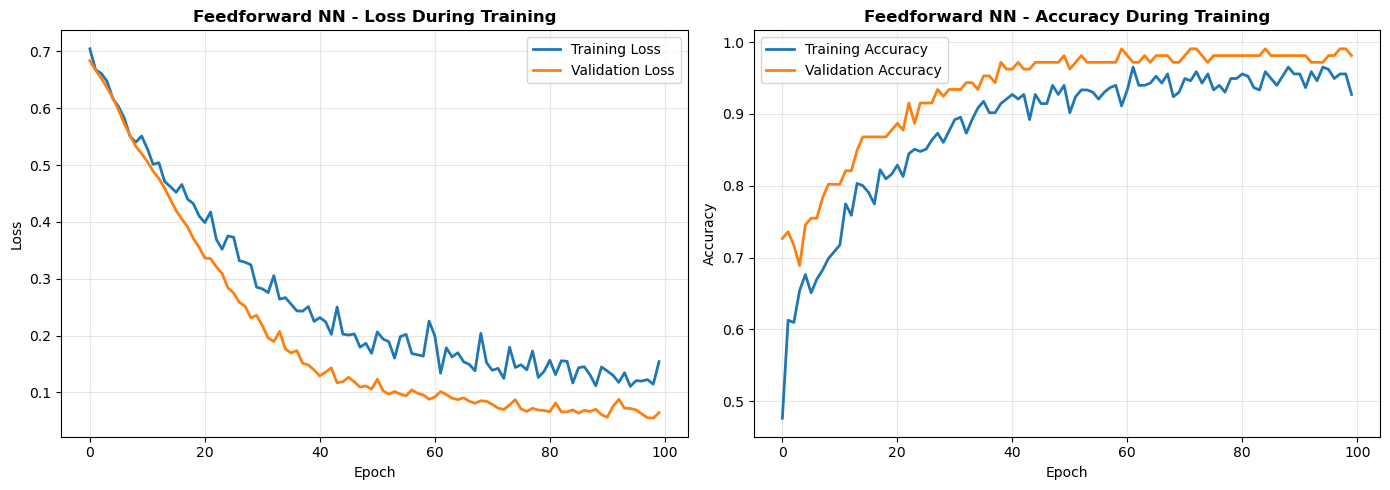

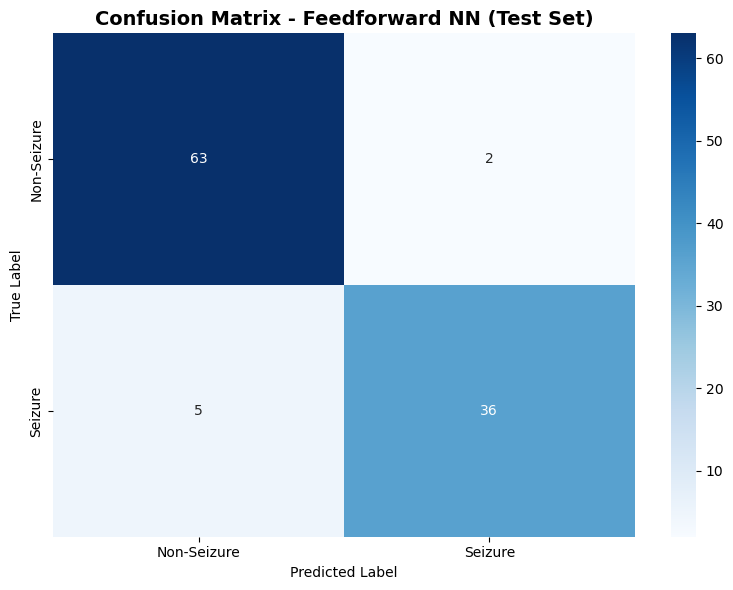

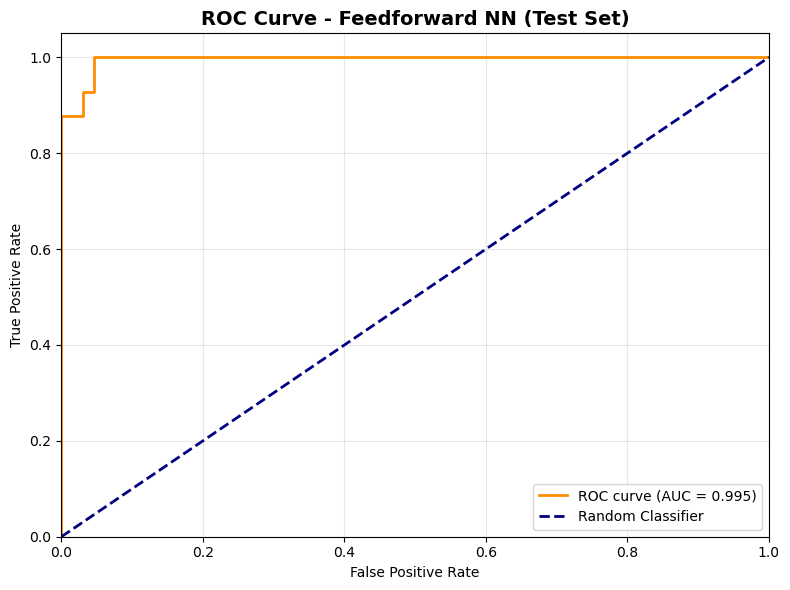

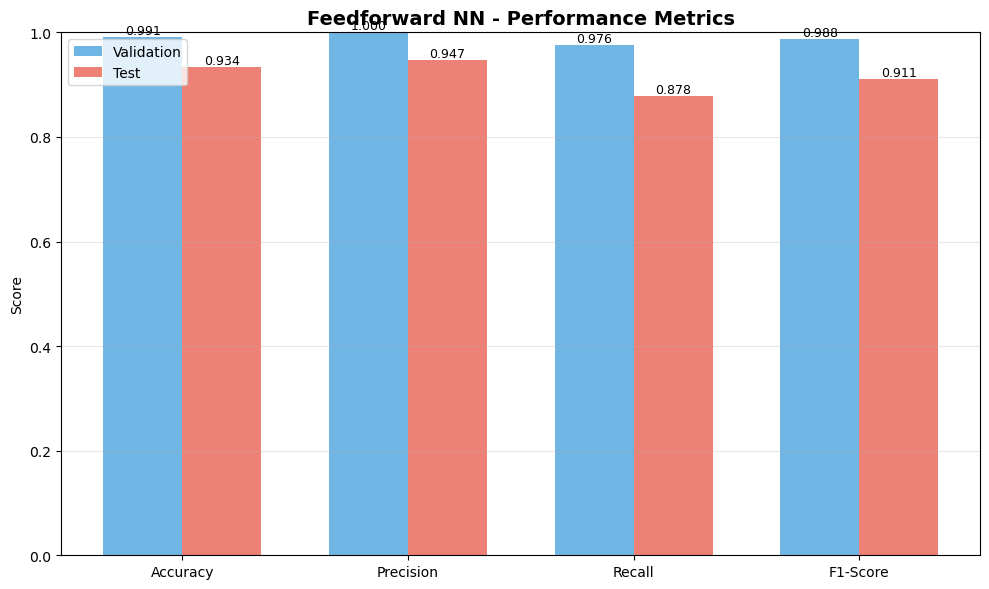


Sample Predictions on Test Set:


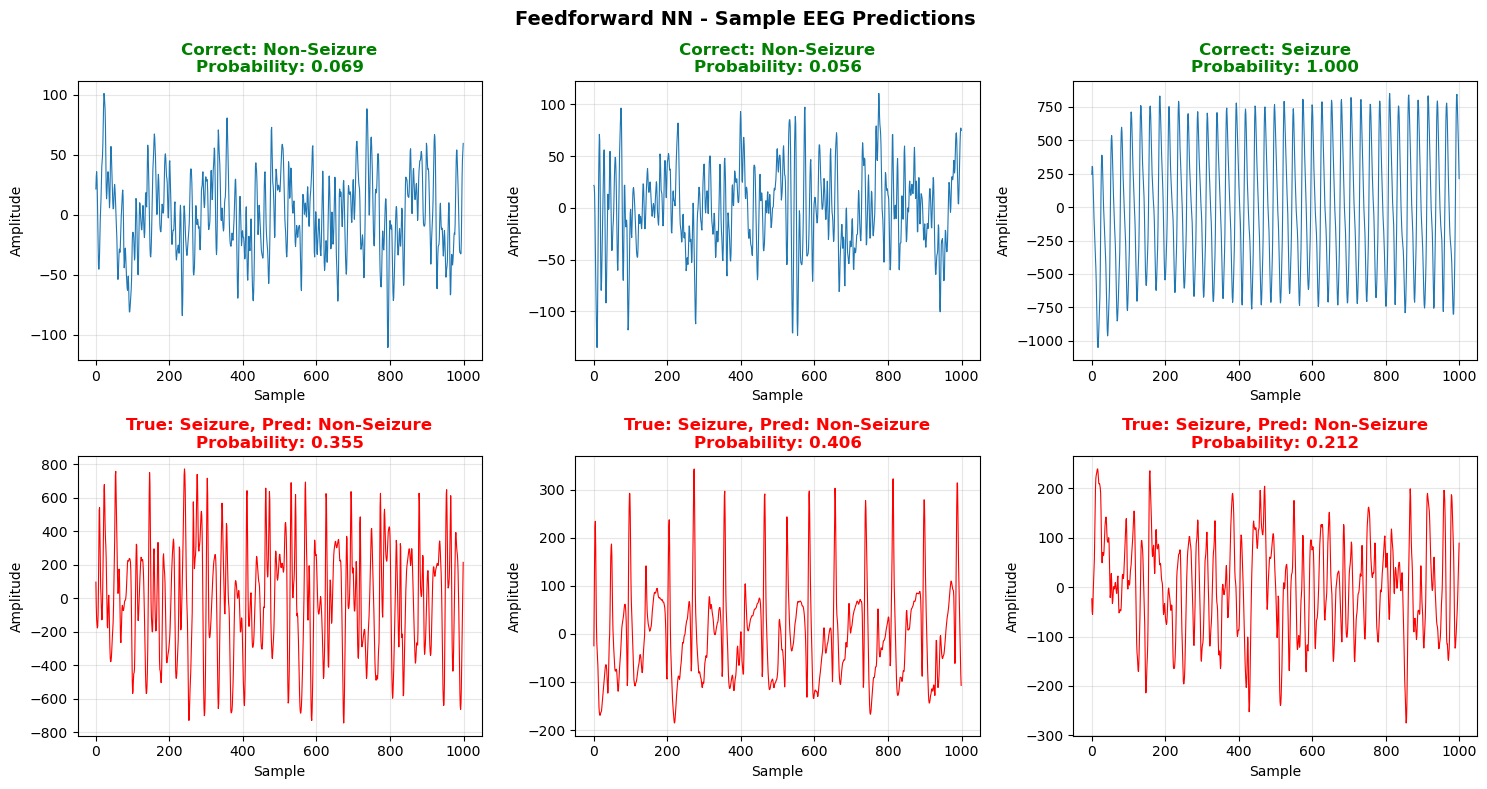

In [29]:
# TASK 8: RESULTS AND VISUALIZATION FOR FINAL MODEL

print("\nTASK 8: RESULTS AND VISUALIZATION")

# Visualization 1: Training History
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(final_history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(final_history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title(f'{best_model_name} - Loss During Training', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].plot(final_history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(final_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_title(f'{best_model_name} - Accuracy During Training', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Visualization 2: Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Seizure', 'Seizure'],
            yticklabels=['Non-Seizure', 'Seizure'])
plt.title(f'Confusion Matrix - {best_model_name} (Test Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Visualization 3: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} (Test Set)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 4: Model Performance Metrics
val_metrics = comparison_df[comparison_df['Model'] == best_model_name].iloc[0]
test_metrics = [test_accuracy, test_precision, test_recall, test_f1]

metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Validation': [val_metrics['Accuracy'], val_metrics['Precision'], 
                   val_metrics['Recall'], val_metrics['F1-Score']],
    'Test': test_metrics
}

metrics_df = pd.DataFrame(metrics_data)

x = np.arange(len(metrics_df['Metric']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, metrics_df['Validation'], width, 
               label='Validation', color='#3498db', alpha=0.7)
bars2 = ax.bar(x + width/2, metrics_df['Test'], width, 
               label='Test', color='#e74c3c', alpha=0.7)

ax.set_ylabel('Score')
ax.set_title(f'{best_model_name} - Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Metric'])
ax.legend()
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Visualization 5: Sample EEG Predictions
print("\nSample Predictions on Test Set:")

correct_indices = np.where(y_test == y_test_pred)[0][:3]
incorrect_indices = np.where(y_test != y_test_pred)[0][:3] if len(np.where(y_test != y_test_pred)[0]) > 0 else []

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for idx, test_idx in enumerate(correct_indices):
    if idx < 3:
        axes[0, idx].plot(X_test[test_idx][:1000], linewidth=0.8)
        true_label = 'Seizure' if y_test[test_idx] == 1 else 'Non-Seizure'
        prob = y_test_pred_proba[test_idx]
        axes[0, idx].set_title(f'Correct: {true_label}\nProbability: {prob:.3f}', 
                               color='green', fontweight='bold')
        axes[0, idx].set_xlabel('Sample')
        axes[0, idx].set_ylabel('Amplitude')
        axes[0, idx].grid(alpha=0.3)

for idx, test_idx in enumerate(incorrect_indices):
    if idx < 3:
        axes[1, idx].plot(X_test[test_idx][:1000], linewidth=0.8, color='red')
        true_label = 'Seizure' if y_test[test_idx] == 1 else 'Non-Seizure'
        pred_label = 'Seizure' if y_test_pred[test_idx] == 1 else 'Non-Seizure'
        prob = y_test_pred_proba[test_idx]
        axes[1, idx].set_title(f'True: {true_label}, Pred: {pred_label}\nProbability: {prob:.3f}', 
                               color='red', fontweight='bold')
        axes[1, idx].set_xlabel('Sample')
        axes[1, idx].set_ylabel('Amplitude')
        axes[1, idx].grid(alpha=0.3)

if len(incorrect_indices) == 0:
    for idx in range(3):
        axes[1, idx].text(0.5, 0.5, 'All predictions correct!', 
                         ha='center', va='center', transform=axes[1, idx].transAxes,
                         fontsize=12, fontweight='bold')
        axes[1, idx].set_xticks([])
        axes[1, idx].set_yticks([])

plt.suptitle(f'{best_model_name} - Sample EEG Predictions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [30]:
# Final Summary
print("\nFINAL PROJECT SUMMARY")
print(f"\nDataset: CHB-MIT + Bonn EEG Database")
print(f"Total Samples: {len(y_train) + len(y_val) + len(y_test)}")
print(f"\nModels Compared:")
print(f"  1. Feedforward NN (on 5 RQA features)")
print(f"  2. CNN (on raw EEG signals)")
print(f"\nFinal Model Selected: {best_model_name}")
print(f"Training Epochs: {len(final_history.history['loss'])}")
print(f"\nTest Set Results:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1-Score:  {test_f1:.4f}")
print(f"  AUC:       {roc_auc:.4f}")


FINAL PROJECT SUMMARY

Dataset: CHB-MIT + Bonn EEG Database
Total Samples: 527

Models Compared:
  1. Feedforward NN (on 5 RQA features)
  2. CNN (on raw EEG signals)

Final Model Selected: Feedforward NN
Training Epochs: 100

Test Set Results:
  Accuracy:  0.9340
  Precision: 0.9474
  Recall:    0.8780
  F1-Score:  0.9114
  AUC:       0.9951
